In [ ]:
options(jupyter.rich_display = F)

# 1 TEST SCORES AND CLASS SIZE

## 1.1 QUESTION

Educators want to know whether there is a correlation between class size and SAT scores of students. Here is a small sample of students:

|      | Test Score| Class Size |
|------|-----------|------------|
| Stu1 | 500       | 22         |
| Stu2 | 630       | 13         |
| Stu3 | 780       | 20         |
| Stu4 | 800       | 10         |
| Stu5 | 350       | 23         |
| Stu6 | 460       | 27         |
| Stu7 | 570       | 15         |
| Stu8 | 580       | 19         |
| Stu9 | 720       | 9          |

1) Create two vectors **ts** with the test score that students obtained and **cs** with the size of class that student attained. 


2) Plot these two vectors with the **ts** on the x-axis and **cs** on the y-axis. Name the x-axis as **"Test Score"** and the y-axis as **"Class Size"**. 


3) Create a linear model **lmodel**, using the **cs** as dependent and the **ts** as independent variable. Then plot that line on the scatter plot.


4) To construct a better estimation between test score and class size, let's create a third order polynomial model **trimodel** and plot the fitted curve in the same graph, colored that fitted curve with green. The plot should look like this:


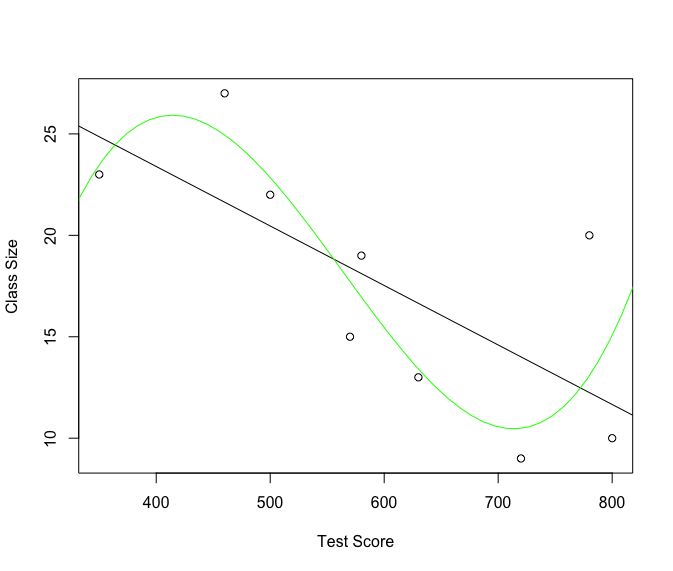



## 1.2 SOLUTION

In [ ]:
#1
ts <- c(500, 630, 780, 800, 350, 460, 570, 580, 720)  
cs <- c(22, 13, 20, 10, 23, 27, 15, 19, 9)

#2
plot(ts, cs, xlab = "Test Score", ylab = "Class Size")

#3
lmodel <- lm(cs ~ ts)
abline(lmodel)

#4
# We should create new variables since we cannot use lm() function with exponential.
x1 <- ts
x2 <- ts^2
x3 <- ts^3
trimodel <- lm(cs ~ x1+x2+x3)

# In order to plot the fitted curve, we should extract the coefficients.
a <- trimodel$coefficients["(Intercept)"]
b <- trimodel$coefficients["x1"]
c <- trimodel$coefficients["x2"]
d <- trimodel$coefficients["x3"]

# Finally, we should create a prediction vector and plot the curve. 
xp <- seq(0, 1000,length.out = 100)
yp <- a + b*xp + c*xp^2 + d*xp^3
lines(xp, yp, col= "green")

# 2 Multiple Variables

## 2.1 QUESTION

We want to analyze linear regression with multiple variables. To do that:
1. First define a variable **a1** which is *18 numbers picked from a normal distribution with mean = 0 and standard deviation = 3* plus *18 numbers sampled from the interval 1:43*.


2. Define a second object **a2** which is *18 numbers picked from a normal distribution with mean = 0 and standard deviation = 7 and divided by 3* plus *18 numbers sampled from the interval 1:20*.


3. Define a third variable **a3** which is 3 times **a2** plus 2 times **a1** plus 18 numbers sampled from the interval 1:25.


4. Create a data frame named **dat** which will return the data frame of **a1**, **a2** and **a3**. 


5. Define a line such that the distances between given points and the line are minimized. To do so, use the **lm()** function and see the coefficients (the intercept, a1 and a2).

## 2.2 SOLUTION

In [ ]:
#1
a1 <- rnorm(18, mean = 0, sd = 3) + sample(1:43, 18)

#2
a2 <- rnorm(18, mean = 0, sd = 7)/3 + sample(1:20, 18)

#3
a3 <- 3*a2 + 2*a1 + sample(1:25, 18)

#4
dat <- data.frame(a1,a2,a3)

#5 
lm(a3~a1+a2, data = dat)

# 3 Orange Trees

## 3.1 QUESTION

For this question, we will be using the built in **Orange** data set in R. There are 3 types of trees in this data set and we want to see the correlation between the age and the circumference of a tree in all three types. 

1. First, define a variable **f** which will subset category *1* of the trees ,define a variable **s** which will subset category *2* of the trees, define a variable **t** which will subset category *3* of the trees in the **Orange** data set. 


2. Draw a line such that the distances between given points of age and circumference of the 1'st category of trees and the line are minimized, use the **lm()** function. Name the function for your line **lm1**. Do the same for the 2'nd and 3'rd category of trees. Name them **lm2** and **lm3** respectively


3. Plot the *age* of tree category 1 on the x axis and *circumference* of tree category 1 on the y axis. Add the line you defined above as **lm1** on your plot. Do the same for the tree categories 2 and 3 with **lm2** and **lm3**. Plot all 3 plots next to each other in one line. 


4. Reveal your plots to look like the one below:

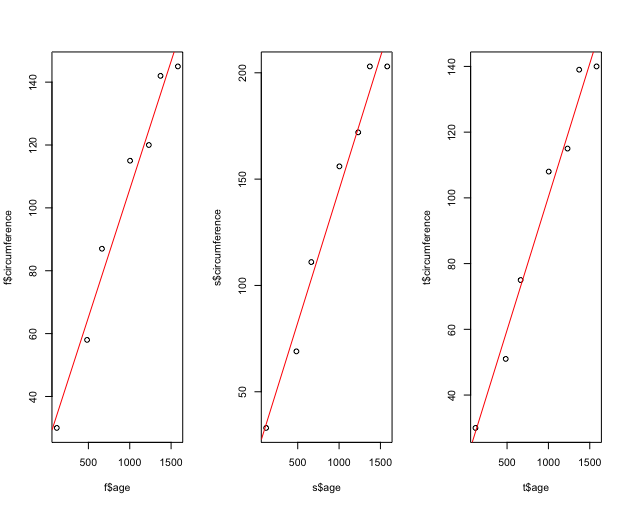

## 3.2 SOLUTION

In [ ]:
#1
f <- Orange[Orange$Tree == "1",]
s <- Orange[Orange$Tree == "2",]
t <- Orange[Orange$Tree == "3",]

#2
lm1 <- lm(f$circumference~f$age, data = f )
lm2 <- lm(s$circumference~s$age, data = s )
lm3 <- lm(t$circumference~t$age, data = t )

#3
par(mfrow = c(1,3))
plot(f$age, f$circumference)
abline(lm1, col = "red")
plot(s$age, s$circumference)
abline(lm2, col = "red")
plot(t$age, t$circumference)
abline(lm3, col = "red")

# 4 VC or OJ

## 4.1 QUESTION

We want to analyze the correlation between tooth growth and vitamin C dose. We will use the **ToothGrowth** data set for this question. There are 2 types of vitamin C supplements defined in this data set: *VC* and *OJ*. We want to see the correlation between *VC* dose and tooth length and *OJ* dose and tooth length.

1. First define a variable named **vc** which will subset the doses and lengths with supplement *VC*. Define a variable named **oj** which will subset the doses and lengths with supplement *OJ*.


2. Next, define **vcdf** such that you will subset de *len* and *dose* columns of **vc** and define **ojdf** such that you will subset de *len* and *dose* columns of **oj**.


3. Use the **cor()** function for **vc** and **oj** respectively with *pearson* method and reveal to see that the *VC* supplement has the larger value of correlation between dose and length. 


## 4.2 SOLUTION

In [ ]:
#1
vc <- ToothGrowth[ToothGrowth$supp == "VC",]
oj <- ToothGrowth[ToothGrowth$supp == "OJ",]

#2
ojdf <- oj[,c("len","dose")]
vcdf <- vc[,c("len","dose")]

#3
cor(vcdf, method="pearson")
cor(ojdf, method="pearson")

# 5 TEMPERATURE & WIND

## 5.1 QUESTION

**airquality** is a data set defined in RStudio and it holds the air quality measurements in New York from May to September 1973.

1. Create a data frame **air** with the temperature and wind measurements by subsetting the **airquality** data set as such:
```r
> head(air)
  temp wind
1   67  7.4
2   72  8.0
3   74 12.6
4   62 11.5
5   56 14.3
6   66 14.9
```


2. See the correlation relationship between temperature and wind.


3. Apply the correlation test to get the confidence interval.

## 5.2 SOLUTION

In [ ]:
#1
air <- data.frame(temp = airquality$Temp, wind = airquality$Wind)
head(air)

#2
cor(air, method = "pearson")

#3
cor.test(air$temp, air$wind, method = "pearson")

# 6 ATTITUDE

## 6.1 QUESTION

**attitude** is a data set defined in RStudio and it holds the results from a survey of the employees of an organization.

1. See the data by using `head()` function.


2. Get the scatter plot matrix of variables by using `pairs()` function to get the paired plots of the variables:
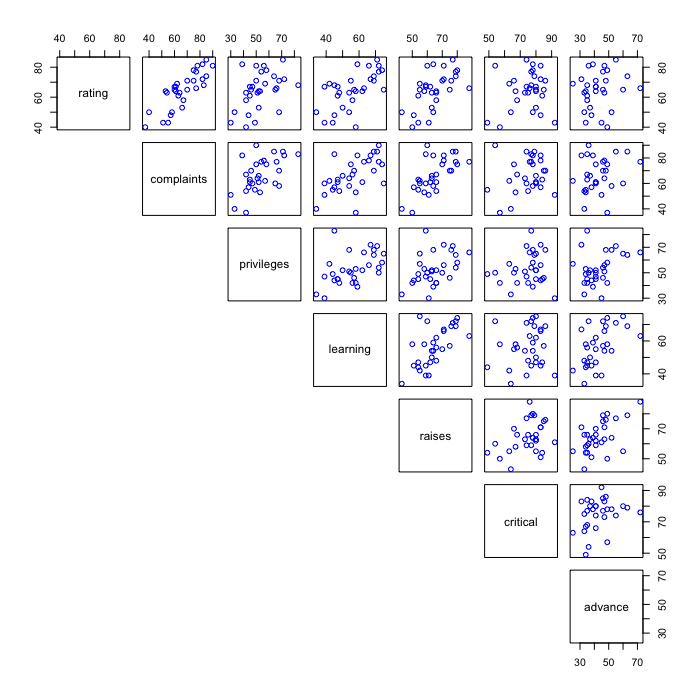

3. It looks like there is a relationship between some variables. Now find their linear models of these couples, and then plot them to show the linear regression.
    - rating & complaints
    - complaints & raises

    It should look like:
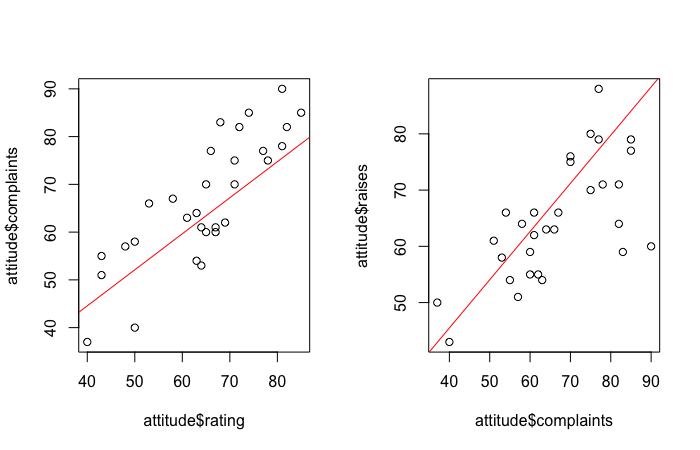


## 6.2 SOLUTION

In [ ]:
#1
head(attitude)

#2
pairs(attitude[, 1:7], col= "blue", lower.panel = NULL)

#3
ratcomp <- lm(attitude$rating ~ attitude$complaints)
comprais <- lm(attitude$complaints ~ attitude$raises)

#ploting
par(mfrow = c(1,2))

plot(attitude$rating, attitude$complaints)
abline(ratcomp, col= "red")

plot(attitude$complaints, attitude$raises)
abline(comprais, col= "red")

# 7 POLYNOMIAL REGRESSION

## 7.1 QUESTION

$$ f(x) = y = -x^{3} + 2x^{2} - x + A $$

1. Create a sequance **x** from -10 to 15 and consists of 50 numbers. 


2. You should first run `RNGversion("3.3.1")` and set seed to 1505. Then create a vector **y** that holds the y values of the polynomial. In $f(x)$, A represent a normal distribution of 50 number with the standarad deviation of 50.


3. Create a data frame **fx** and set up the linear model of the variables named **linm**. Make the necessary predictions by using the linear model to get the polynomial model.


4. Plot $f(x)$ and then depict the polynomial model with blue color.
    The plot should be as such:
   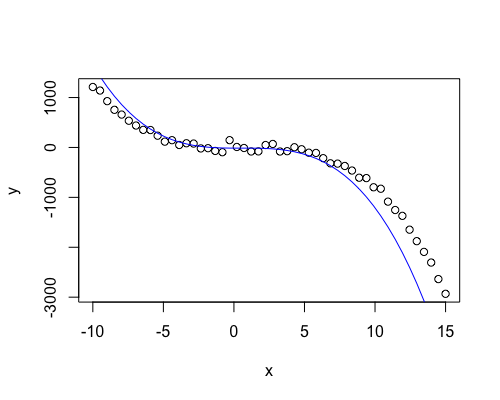


## 7.2 SOLUTION

In [ ]:
#1
x <- seq(-10, 15, length.out = 50)

#2
RNGversion("3.3.1")
set.seed(1505)
x1 <- -x
x2 <- 2* x^2
x3 <- -x^3
y <-  x3 + x2 + x1 + rnorm(50, sd= 50)


#3
fx <- data.frame(x1, x2, x3, y)
linm <-lm(y ~ x1+x2+x3, data = fx)

#predictions
a <- linm$coefficients["x1"]
b <- linm$coefficients["x2"]
c <- linm$coefficients["x3"]
d <- linm$coefficients["(Intercept)"]

xpred <- seq(-10, 15, length.out = 50)
ypred <- a * x3 + b * x2 + c * x1 + d

#4
plot(x, y)
lines(xpred, ypred, col = "blue")

# 8 IRIS

## 8.1 QUESTION 

There is a built-in data set **"iris"** in R, which gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris.

1) Observe the data set by using **head()** function. 

2) Create three data frames **setosa**, **versicolor** and **virginica** with the features of the three species seperately by filtering **iris**.

3) Find which of the three species has the highest correlation coefficient between its sepal length and petal length. Calculate them. 

```r
> cc_setosa
[1] 0.2671758
```
```r
> cc_versicolor
[1] 0.754049
```
```r
> cc_virginica
[1] 0.8642247
```

4) Find three linear models in which the variable y will be the petal length and x will be the sepal length for the three data frames. For example the model for **setosa** will be as such:

```r
> lmsetosa

Call:
lm(formula = setosa$Petal.Length ~ setosa$Sepal.Length)

Coefficients:
        (Intercept)  setosa$Sepal.Length  
             0.8031               0.1316  
```

5) Now we will create four scatter plots in the same image and add the lines resulting from the models (with the colour red). First one will show the correlation between the sepal length and the petal length of **setosa** with the sepal length on the x-axis and the petal length on the y-axis. The second and third plots will do the same with **versicolor** and **virginica** respectively. The last one will represent the correlation between the two features of **iris**. The final image should be as such:

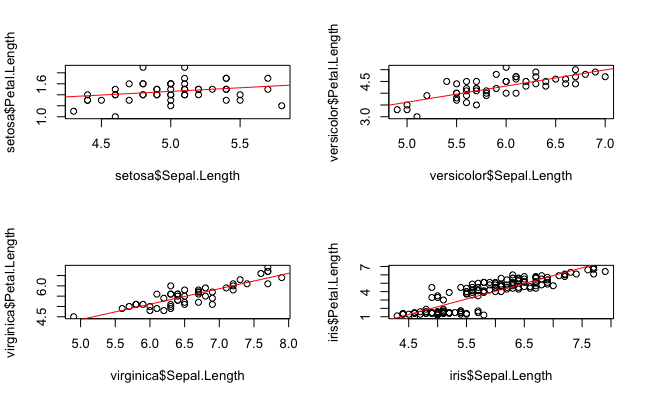

## 8.2 SOLUTION

In [ ]:
#1
head(iris)

#2
setosa <- iris[iris$Species == "setosa",]
versicolor <- iris[iris$Species == "versicolor",]
virginica <- iris[iris$Species == "virginica",]

#3
cc_setosa <- cor(setosa$Petal.Length, setosa$Sepal.Length)
cc_setosa
cc_versicolor <- cor(versicolor$Sepal.Length, versicolor$Petal.Length)
cc_versicolor
cc_virginica <- cor(virginica$Sepal.Length, virginica$Petal.Length)
cc_virginica

#4
lmsetosa <- lm(setosa$Petal.Length ~ setosa$Sepal.Length)
lmsetosa
lmversicolor <- lm(versicolor$Petal.Length ~ versicolor$Sepal.Length)
lmvirginica <- lm(virginica$Petal.Length ~ virginica$Sepal.Length)
lmiris <- lm(iris$Sepal.Length ~ iris$Petal.Length, data = iris)

#5
par(mfrow = c(2,2))
plot(setosa$Sepal.Length, setosa$Petal.Length)
abline(lmsetosa, col= "red")
plot(versicolor$Sepal.Length, versicolor$Petal.Length)
abline(lmversicolor, col = "red")
plot(virginica$Sepal.Length, virginica$Petal.Length)
abline(lmvirginica, col= "red")
coefficients(lmvirginica)
plot(iris$Sepal.Length, iris$Petal.Length)
abline(lmiris, col= "red")

# 9 MTCARS

## 9.1 QUESTION

There is a built-in data set **"mtcars"** in R which comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles. 

1) Observe the data set by using **head()** function.

2) Construct another data frame **mtcars2** with the columns **mpg**, **disp**, **hp** and **wt** by filtering **mtcars** as such:
```r
> head(mtcars2)
                   mpg disp  hp    wt
Mazda RX4         21.0  160 110 2.620
Mazda RX4 Wag     21.0  160 110 2.875
Datsun 710        22.8  108  93 2.320
Hornet 4 Drive    21.4  258 110 3.215
Hornet Sportabout 18.7  360 175 3.440
Valiant           18.1  225 105 3.460
```

3) Construct a function **coef** which takes a data frame **df** as an argument and create a relationship model by taking the variable in the first column of **df** as the dependent variable (y) and the other three as the independent variables (x1, x2 and x3). Your function should return the scatter plot of **df** and the coefficients of the model. (Remember that the names of the resulting vector's elements should be arranged according to the column names of df.)

4) Try your function with **mtcars2**. The result should be as such:

```r
> coef(mtcars2)
  (Intercept)          disp            hp            wt 
37.1055052690 -0.0009370091 -0.0311565508 -3.8008905826 
```
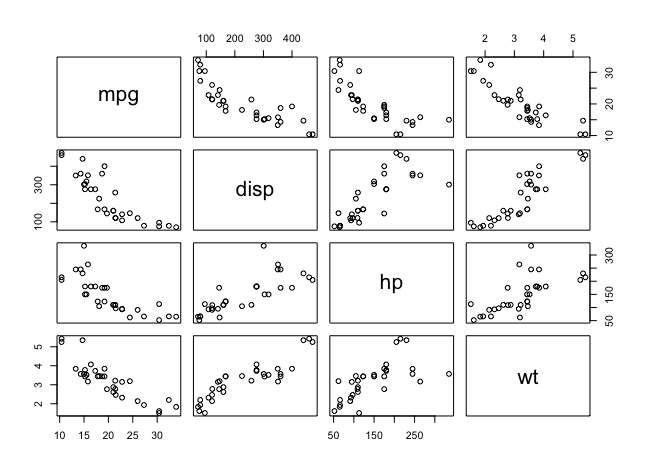

## 9.2 SOLUTION

In [ ]:
#1
head(mtcars)

#2
mtcars2 <- mtcars[, c("mpg","disp","hp","wt")]
mtcars2

#3
coef <- function(df)
{
  mdl <- lm(df[[1]] ~ df[[2]] + df[[3]] + df[[4]])
  plt <- plot(df)
  cfs <- coefficients(mdl)
  names(cfs)[-1] <- colnames(df)[-1]
  return(c(cfs, plt))
}

#4
coef(mtcars2)

# 10 TREADMILL AND ELLIPTICAL

## 10.1 QUESTION

A fitness club wants to know whether there is a correlation between how many munites its members stay on the treadmill and how many munites they use the elliptical in a particular day. So the managers collect the following data:

|      | Treadmill | Elliptical |
|------|-----------|------------|
| Ind1 | 32        | 99.5       |
| Ind2 | 64        | 104.8      |
| Ind3 | 96        | 108.5      |
| Ind4 | 118       | 100        |
| Ind5 | 126       | 86         |
| Ind6 | 144       | 64         |
| Ind7 | 152.5     | 35.3       |
| Ind8 | 158       | 15         |

1) First create two vectors **tm** with the time that individuals spend on treadmill and **el** with the time spent on elliptical. 

2) Plot these two vectors with the **tm** on the x-axis and **el** on the y-axis to see the relationship. The name of the x-axis should be **"Minutes on Treadmill"** and the y-axis should be called **"Minutes on Elliptical"**. 

3) Create a linear model **lmodel** by taking the **el** vector as dependent and the **tm** vector as independent variable. Then plot the line resulting from your model on your scatter plot.

4) See that the distances between the points and the line are not so small actually. We can come up with a better formula for the relationship between them. So, create a third order polynomial model **lmodel2** and plot the fitted curve on you plot with the colour red. The resulting image should be as such:

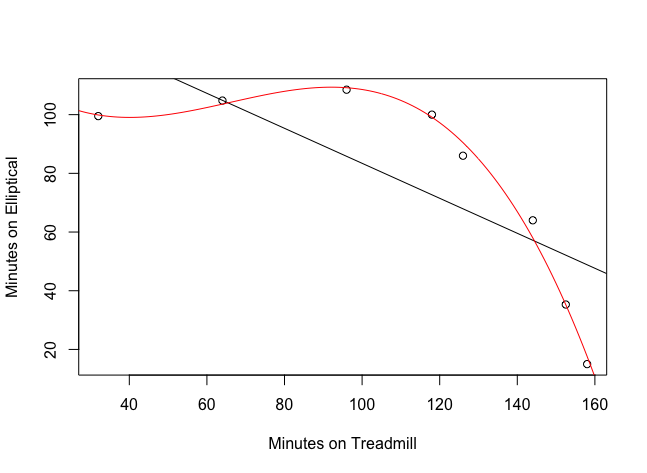

## 10.2 SOLUTION

In [ ]:
#1
tm <- c(32,64,96,118,126,144,152.5,158)  
el <- c(99.5,104.8,108.5,100,86,64,35.3,15)

#2
plot(tm,el, xlab = "Minutes on Treadmill", ylab = "Minutes on Elliptical")

#3
lmodel <- lm(el ~ tm)
abline(lmodel)

#4
# We cannot write x^2 and x^3 in the lm() function, so we create new variables.
x1 <- tm
x2 <- tm^2
x3 <- tm^3
lmodel2 <- lm(el ~ x1+x2+x3)

# We cannot use abline() function to plot our new curve, so first, we will extract the coefficients.
a <- lmodel2$coefficients["(Intercept)"]
b <- lmodel2$coefficients["x1"]
c <- lmodel2$coefficients["x2"]
d <- lmodel2$coefficients["x3"]

# Then we will set up a prediction vector and plot the curve. 
xp <- seq(0,160)
yp <- b*xp + c*xp^2 + d*xp^3 + a
lines(xp,yp, col= "red")

# 11 DEMOCRACY SCORES AND GDP PER CAPITA

## 11.1 QUESTION

Suppose that we are curious about whether a country's democracy score at Freedom House and GDP per capita (in dollars) are correlated.

1. First create a vector called **countries** which includes countries: US, UK, Egypt and Iran.


2. Their corresponding democracy scores are 86, 94, 21 and 17 (save these numbers by creating a vector called **democracy_scores**).


3. Their corresponding gdp per capita levels are 65111, 41030, 3046 and 5506 (save these numbers by creating a vector called **gdp_per_capita**).


4. Attach the country names to the **democracy_scores** vector by using the appropriate function.


5. Find the correlation coeffcient.

```r
[1] 0.9124372
```

## 11.2 SOLUTION

In [ ]:
#1
countries <- c("US", "UK", "Egypt", "Iran")

#2
democracy_scores <- c(86, 94, 21, 17)

#3
gdp_per_capita <- c(65111, 41030, 3046, 5506)

#4
names(democracy_scores) <- countries

#5
cor(democracy_scores, gdp_per_capita, method = "pearson")

# 12 GDP GROWTH VS. INFLATION RATE

## 12.1 QUESTION


   |**Year**   | **GDP Growth (annual, %)**    | **CPI (Year to Year % Changes, January)**|
    |:-------:  |:---------------------------:  |:--------------------------------------:|
    |2018       |    2.83                       | 10.35                                  |
    |2017       |    7.47                       | 9.22                                   |
    |2016       |    3.18                       | 9.58                                   |
    |2015       |    6.09                       | 7.24                                   |
    
    
The second column of this table incudes annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2010 U.S. dollars (from the World Bank). The third column includes annual inflation rates announced by the Turkish Statistical Institute (TURKSTAT).

1. Create vector called **gdp_growth** which includes the numbers indicated above.


2. Create vector called **cpi** which includes the numbers indicated above.


3. Create a linear regression model by using the data like this:

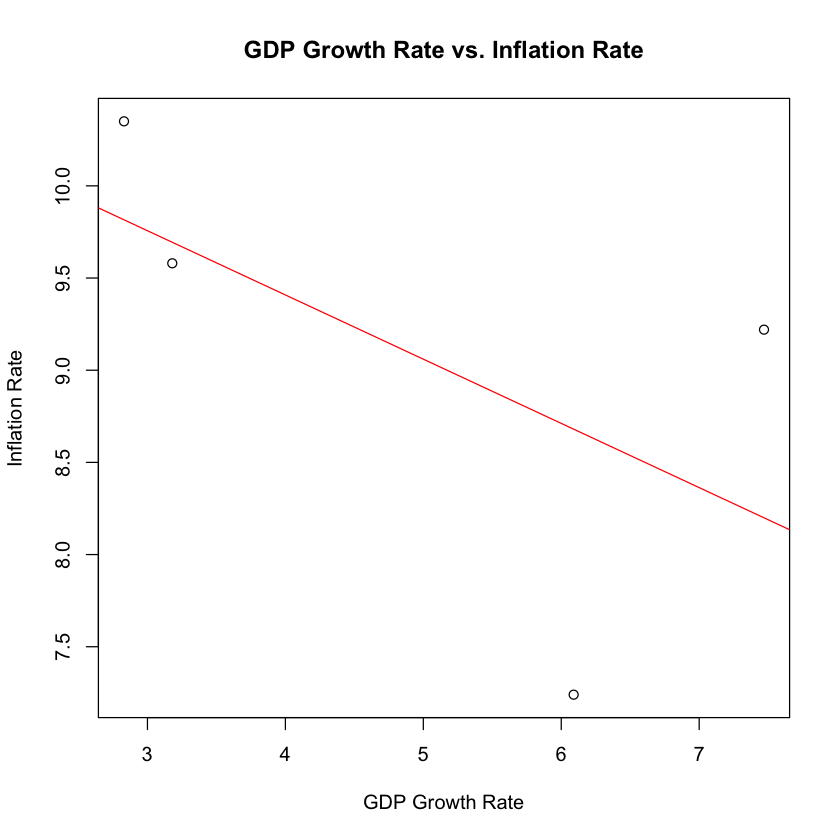

## 12.2 SOLUTION

In [ ]:
#1
gdp_growth <- c(2.83, 7.47, 3.18, 6.09)

#2
cpi <- c(10.35, 9.22, 9.58, 7.24)

#3
plot(sort(gdp_growth), cpi[order(gdp_growth)], xlab = "GDP Growth Rate", 
     ylab = "Inflation Rate", main = "GDP Growth Rate vs. Inflation Rate")

linmodel <- lm(cpi~gdp_growth)

abline(linmodel, col="red")

# 13 QUADRATIC MODEL

## 13.1 QUESTION

$$ y = ax^{2} + bx + c $$

1. Create a function called **quadmodel** which creates a quadratic model.


2. The function takes three arguments: **a**, **b** and **c**.


3. While creating the model think **a**, **b** and **c** as coefficients of a quadratic equation as indicated in the example above.


4. In the plot, the input variable (x) includes numbers form 1 to 50.


5. While creating the output variable (y), add 50 numbers normally distributed with mean 0 and standard deviation 120 to the quadratic equation (in order to create noise, hence making the data more realistic).


6. While creating the quadratic model; in the input side (x), create 100 numbers from 1 to 50 (use **length.out** argument in the appropriate function). 


7. Finally, 

```r
RNGversion("3.3.1")
set.seed(200)
```

and create a graph as indicated below:

```r
> quadmodel(2,3,4)
```

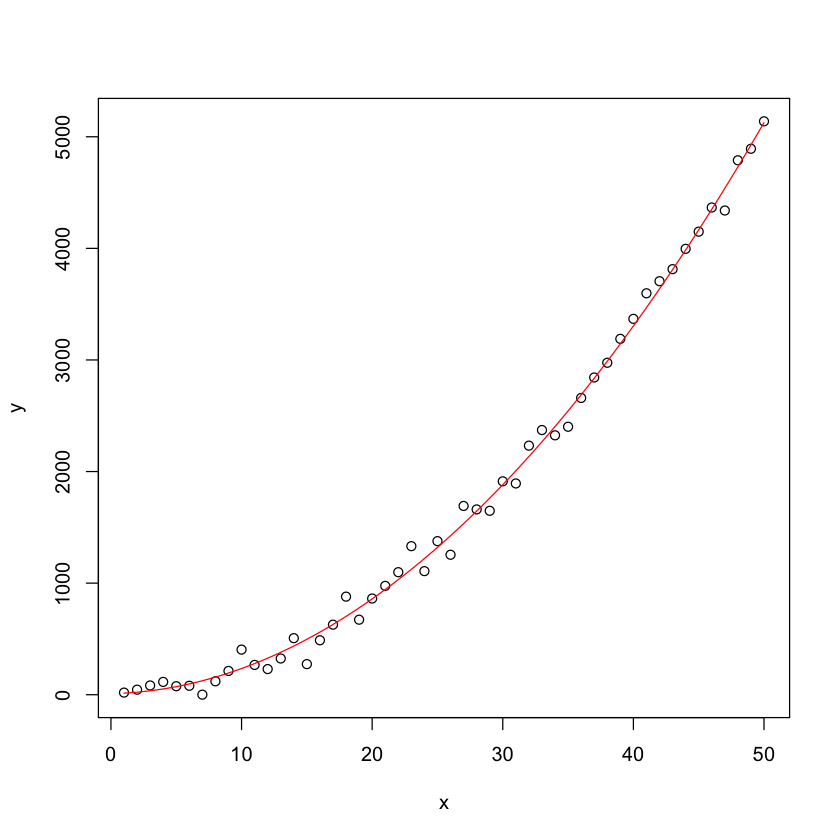



## 13.2 SOLUTION

In [ ]:
#1 to #6
RNGversion("3.3.1")
set.seed(200)

quadmodel <- function(a, b, c)
{
  x <- 1:50
  y <- a*x^2 + b*x + c + rnorm(50, sd=120)
  x1 <- x
  x2 <- x^2
  q_model <- lm(y~x1+x2, data=data.frame(x1,x2,y))
  k <- q_model$coefficients["x1"]
  l <- q_model$coefficients["x2"]
  m <- q_model$coefficients["(Intercept)"]
  xp <- seq(1,50,length.out = 100)
  yp <- k*xp + l*xp^2 + m
  plot(x,y)
  return(lines(xp,yp, col="red"))
}

#7
quadmodel(2,3,4)

# 14 PREDICTING THE FINAL SCORE

## 14.1 QUESTION

Feyza realised that there is a linear relationship between her hours of study, how interested she is in that subject and her final score. So SHE recorded how many hours she studied and gave a score to each course indicating how interesting she finds them. Using the following table, she wants to predict her final score for microeconomics.

| Course         | Hours | Interest  | Final Score  |
|----------------|---|---|---|
| Film Analysis  | 2  | 9  | 78 |  
| Statistics     | 5  | 5  |  63 |  
| Turkish        | 3  |  2 |  29 | 
| Business Law   | 7  | 2  | 55.5  |  
| Microeconomics | 4  | 5  |   | 

1. Keeping microeconomics out, assign study hours to a variable named **hours**.


2. Keeping microeconomics out, assign interest scores to a variable named **interest**


3. Keeping microeconomics out again, assign interest scores to a variable named **final_score**


4. Use the built in `lm()` function to create a linear model and assign it to a variable named **my_model**


5. Make a prediction for microeconomics final score using your model's _coefficients_ and assign it to a variable named **micro_final**. Remove the element name and round your prediction to 2 decimal places as such:

```r
> names(micro_final) <- c()

> round(micro_final, digits = 2)

58.68
```
**Hint:** You can use the `coef()` function to get your model's coefficients.

## 14.2 SOLUTION

In [ ]:
#1
hours <- c(2, 5, 3, 7)

#2
interest <- c(9, 5, 2, 2)

#3
final_scores <- c(78, 63, 29, 55.5)

#4
my_model <- lm(final_scores ~ interest + hours)

#5
micro_final <- 4 * coef(my_model)["hours"] + 5 * coef(my_model)["interest"] + coef(my_model)["(Intercept)"]

#5 alternative
# micro_final <- predict.lm(my_model, newdata = data.frame(interest = 5, hours = 4))

names(micro_final) <- c()
round(micro_final, digits = 2)

# 15 NEW TOWN ROAD

## 15.1 QUESTION

You are the mayor of a small town and want to improve transportation for town's people by building a road. As you have a very limited budget, you can only build a straight road but you want to minimize the _total effort_ of the people. Apparently, _effort_ of a family while going to the road can be calculated as the _square of the distance between their home and the road_. Note that because of the landscape of the town; people can only towards north or south, and can't go to east or west of their houses before reaching the road.

X and Y coordinates of the houses are given as vectors:

```r
xc <- c(3.8, 7.5, 11.5, 15, 20, 23.7) 
yc <- c(2.3, 4.5, 6.1, 7.7, 9.5, 11.9)
```

1. Create a function named **build_road** that takes three arguments:
    + **house_x:** A vector containing the x coordinates of the houses
    + **house_y:** A vector containing the y coordinates of the houses
    + **m:** A vector containing the values that we choose between (as the slope of the line that road will be on).
 
 
2. Inside this function:

    + For each value of **m**;
        - Calculate a value called **n** such that linear equation $y_{mean} = m*x_{mean} + n$ holds for the average values of **house_x** and **house_y** .
        - For each house, find the y coordinate of the road at house's x coordinate using the **n** value you calculated. Assign these y coordinates to a vector called **road_y**.
        - Calculate the _total effort_ (sum of the squared distances between **house_y** and **road_y**).
    + Record the _total effort_ you calculated for each value of **m** and assign it to a new variable called **tot_effort**.
    + Find the **m** value that causes the least _total effort_. Assign this value to **slope**.
    + Calculate a value called **intercept** such that linear equation $y_{mean} = slope*x_{mean} + intercept$ holds for the average values of **house_x** and **house_y** .


3. Your function should return a vector containing the optimal coeffients for the mathematical expression of the road you will build as such:

```r
> set.seed(00111010)
> build_road(house_x = xc, house_y = yc, m = seq(from = 0, to = 20, length.out = 10000)) 

Slope
    0.458045804580458
Intercept
    0.778211154448778
```

Because of your success of building roads, you are appointed as the minister of transportation to build even more linear roads! But you quickly realised that choosing the right value for the **m** argument of **build_road** takes too much time when you need to build hundreds of roads. Using your calculus and linear algebra knowledge, you find that optimal slope of the road can be calculated as:


<center>$Slope = Correlation_{XY} * {Standard Deviation}_{Y}/{Standard Deviation}_{X}$</center>

4. Create a function called **build_roads_faster** that takes 2 arguments: **house_x** and **house_y**. These arguments are vectors containing the X and Y coordinates of houses in an area.


5. Inside **build_roads_faster**, calculate the optimal slope of the road using the given formula and assign it to **slope**.


6. Inside **build_roads_faster**, calculate a value named **intercept** such that $y_{mean} = slope*x_{mean} + intercept$ holds for the average values of **house_x** and **house_y**.


7. Your function should return a vector containing the optimal coeffients for the mathematical expression of the road you will build as such:

```r
> set.seed(01000100)
> build_roads_faster(house_x = sample(-100:100, 70, T), house_y = sample(-100:100, 70, T))

Slope
    -0.166557748736457
Intercept
    2.55490349807118
```

## 15.2 SOLUTION

In [ ]:
xc <- c(3.8, 7.5, 11.5, 15, 20, 23.7) 
yc <- c(2.3, 4.5, 6.1, 7.7, 9.5, 11.9)

#1
build_road <- function(house_x = xc, house_y = yc, m)
{
  #2
  tot_effort <- c()
  for (m1 in m) #iterate over m values
  {
    n <- mean(house_y) - m1 * mean(house_x) #mean(house_y) = m1 * mean(house_x) + n 
    road_y <- m1 * house_x + n
    tot_effort <- c(tot_effort, sum((road_y - house_y) ^ 2))
  }
  slope <- m[order(tot_effort, decreasing = F)[1]] #element of m that gives the smallest tot_effort
  intercept <- mean(house_y) - slope * mean(house_x)
  #3
  return(c(Slope = slope, Intercept = intercept))
}

set.seed(00111010)
build_road(house_x = xc, house_y = yc,
           m = seq(from = 0, to = 20, length.out = 10000)) #chooses the best m value between 10000 numbers 
                                                           #there might be a better value outside this 10000
#4
build_roads_faster <- function(house_x, house_y)
{
  #5
  slope <- cor(house_x, house_y) * sqrt(var(house_y)) / sqrt(var(house_x)) #best value of m (or slope)
  #6
  intercept <- mean(house_y) - slope * mean(house_x) 
  #7
  return(c(Slope = slope, Intercept = intercept))
}

set.seed(01000100)
build_roads_faster(house_x = sample(-100:100, 70, T), house_y = sample(-100:100, 70, T))

# 16 CARS

## 16.1 QUESTION

There is a built in dataset in R named **cars** which shows speed of cars and the distances taken to stop. We will work on the correlation between speed and distance given in this data set.

1. Calculate the Pearson correlation coefficient.

2. Plot **cars** and the line which shows the relation between two columns of **cars** on the same plot as such :

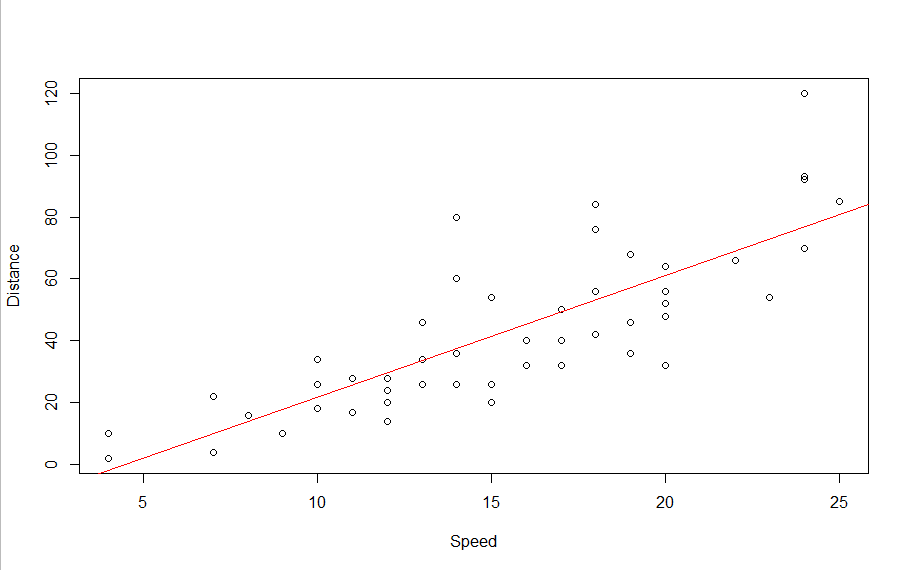




## 16.2 SOLUTION

In [ ]:
#1

cor(cars$speed,cars$dist)

#2 

f <-lm(cars$dist ~ cars$speed, data = cars)
plot(cars$speed, cars$dist, xlab = "Speed",ylab = "Distance")
abline(f, col = "red")

# 17 LINEAR REGRESSION 

## 17.1 QUESTION

 1. Copy the lines below to create 3  vectors. Create a data frame by using them.(as columns)
 
 ```r
RNGversion("3.3.1")
set.seed(5)
a <- seq(0,30,length.out=100)
b <- -0.15*a^2 + 3*a + rnorm(100,mean=30,sd=5)
c <- b + rnorm(100)
```
 
 2. Plot the data frame as such :
 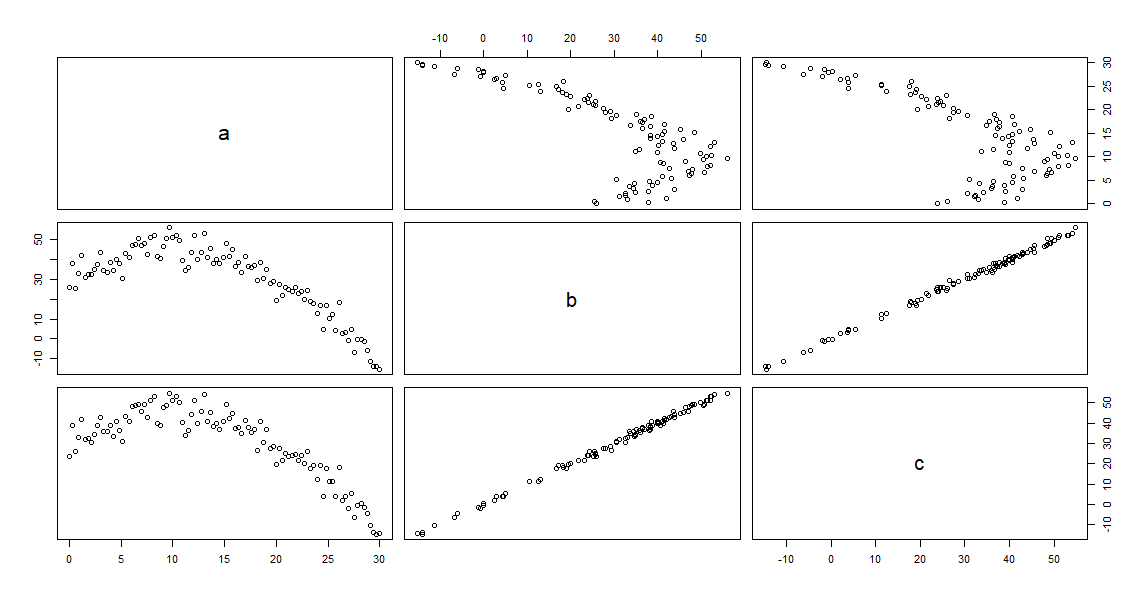
 
 
 3. Now, create three plots which show relations between **a** & **b**, **a** & **c**, **b** & **c** respectively including the lines such that the distances between given points and the lines are minimized. As such:
 
 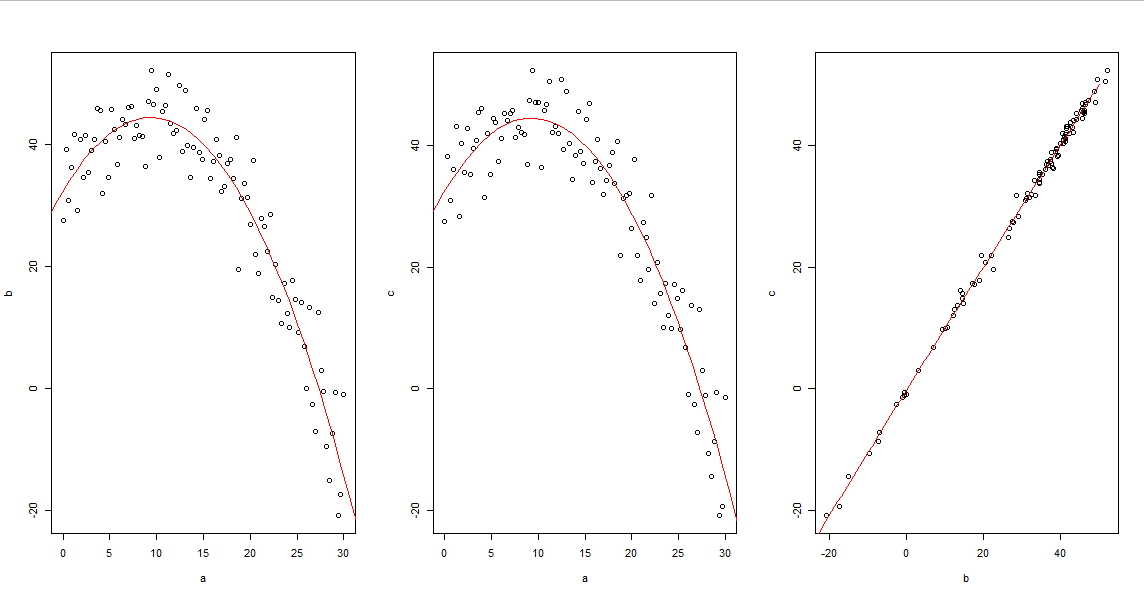

## 17.2 SOLUTION

In [ ]:
#1
RNGversion("3.3.1")
set.seed(5)
a <- seq(0, 30, length.out = 100)
b <- -0.15 * a^2 + 3 * a + rnorm(100, mean = 30, sd = 5)
c <- b + rnorm(100)
df <- data.frame(a, b, c)
df

#2
plot(df)

#3
par(mfrow = c(1, 3)) #We want to show 3 plots in the same figure. so we use par()
for(i in 1:2) #We will not show c in the x axis so i iterates form 1 to 2
  {
  for(j in 2:3) # We will not show a on y axis so j starts from 2, ends up at 3
    {
    if( i != j)
    {
      x <- df[,i]
      x2 <- df[,i]^2 
      y <- df[,j]
      r <- lm(y ~ x + x2, data = data.frame(x,x2,y)) #we need the coefficients of the line that we want to draw
      cofs <- c(r$coefficients) #creating a vector which holds the necessary coefficients
      ints <- seq(-30, 50, length.out = 100)
      lns <- cofs["x2"] * ints^2 + cofs["x"] * ints + cofs["(Intercept)"]
      plot(df[,i], df[,j], xlab = colnames(df)[i], ylab = colnames(df)[j]) #plotting the vectors
      lines(ints, lns, col = "red") #plotting the lines
    }
  }
}





# 18 JAMES' WORKOUT

## 18.1 QUESTION

James will start to apply a workout programme in a fitness center. He has 3 different programmes to choose from. He has data about three programmes which show the average success rate of people who had applied that programmes before as the day that they had applied that programme increases. For example people who had continued to apply the first programme for 30 days received 47% in average succes and those who had continued to apply for 60 days receive 91% of succes in average and so on.

1. Create the vectors which hold the data by copying the lines below. 
```r
RNGversion("3.3.1")
set.seed(10)
days <- 1:60
wrk1 <- round((0.5*days + rnorm(60,sd = 5, mean = 7)) / 46, digit = 2)
wrk2 <- round((2.5*days + rnorm(60, sd = 5, mean = 6)) / 175, digit = 2)
wrk3 <- round((2.5*days + rnorm(60, sd = 10, mean = 10)) / 175, digit = 2) 
```
2. Create a data frame named **choices** out of these vectors. Plot the graph which shows the correlations between each of the data. As such :

```r
> choices 
   Days  WP1  WP2  WP3
1     1 0.03 0.05 0.04
2     2 0.12 0.06 0.10
3     3 0.09 0.04 0.10
4     4 0.23 0.07 0.05
5     5 0.32 0.11 0.16
.
.
.
59   59 0.93 0.86 0.95
60   60 0.91 0.90 0.95
```
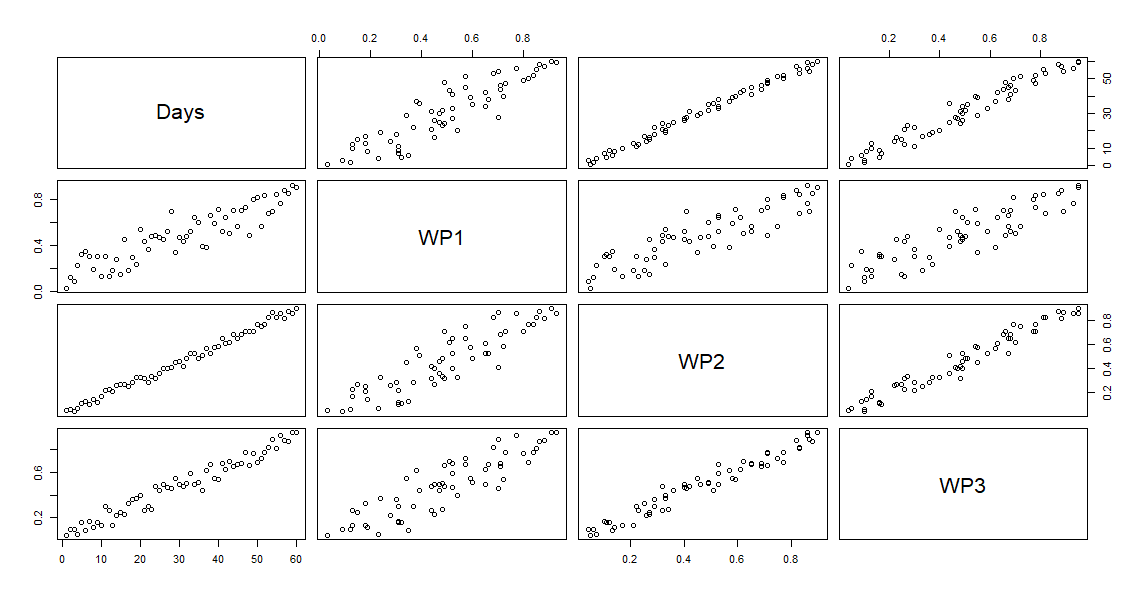

3. Create 3 plot in the same figure which show the relation between days and the succes rates of each programme.As such:
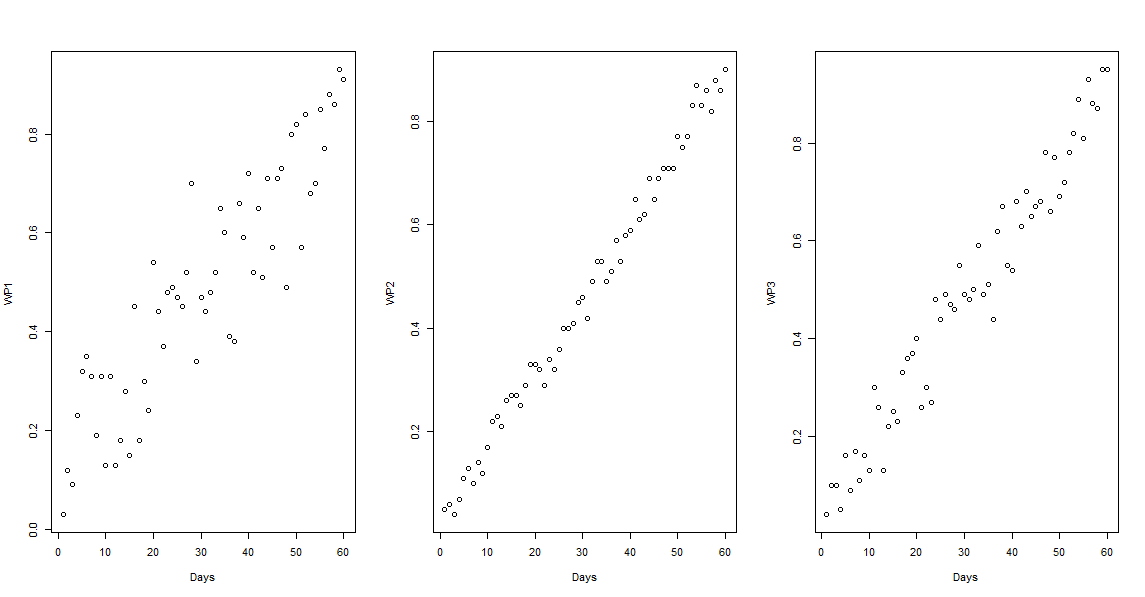

4. James wants to choose the programme which shows the strongest relation between number of days and the success rates.(Use Pearson correlation coefficient.) Create a function named **workout** wtyh one argument **df** which has **choices** as its default value and which returns the plot which shows the relation between number of days and the succes rates of this particular workout programme. As such :

```r
> workout(choices)
```
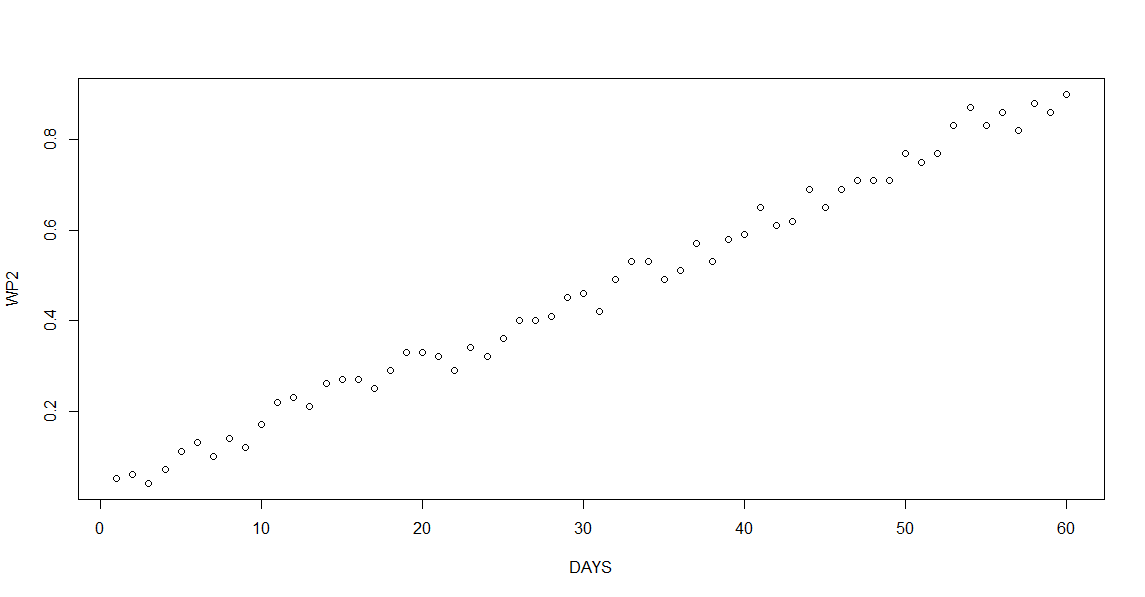


## 18.2 SOLUTION

In [ ]:
#1
RNGversion("3.3.1")
set.seed(10)
days <- 1:60
wrk1 <- round((0.5 * days + rnorm(60, sd = 5, mean = 7)) / 46, digit = 2)
wrk2 <- round((2.5 * days + rnorm(60, sd = 5, mean = 6)) / 175, digit = 2)
wrk3 <- round((2.5 * days + rnorm(60,sd = 10, mean = 10)) / 175, digit = 2) 

#2
choices <- data.frame("Days" = days, "WP1" = wrk1,"WP2" = wrk2, "WP3" = wrk3)
choices
plot(choices)

#3
par(mfrow = c(1,3))
for(i in 2:4)
{
  plot(choices[,1], choices[,i], xlab = colnames(choices)[1], ylab = colnames(choices)[i])
}

#4
workout <- function(df)
{
  par(mfrow = c(1,1))
      coef <- cor(df)
  trn <- which.max(coef[2:3,1]) + 1
  return(plot(df[,1], df[,trn], xlab = "DAYS", ylab = colnames(df)[trn ]))
}

workout(choices)
